# Homework 08

In this assignment, you will demonstrate your learning about creating data visualizations in Python using Seaborn. When you finish **please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct and all visualizations are visible before saving and submitting your .ipynb file (the notebook file) on gradescope**.

We will work with the `university_data.csv` dataset imported into the `uni` DataFrame below. We then preview the first few rows. It contains information about 311 universities in the United States including average student test scores and gpa, tuition costs, the state in which the school is located, the ranking, etc.

**Note: There are no automated tests for this notebook because it is all about your skills at creating visualizations. Below is a single test to help you notice if you accidentally submitted the wrong file. The answer is `'homework 8'`.**

In [1]:
# Hint: Read the bolded text right above
this_is_homework = 'homework 8'

In [2]:
# Run but do not modify this code
import seaborn as sns
import pandas as pd
sns.set_theme()
uni = pd.read_csv("university_data.csv")
print(uni.shape)
uni.head()

(311, 13)


,act_avg,sat_avg,enrollment,city,acceptance_rate,percent_receiving_aid,cost_after_aid,state,hs_gpa_avg,tuition,Institution_name,institution_type,us_rank
0,32.0,1400.0,5400.0,Princeton,7.0,60.0,16793.0,NJ,3.9,47140,Princeton University,private,1.0
1,32.0,1430.0,6710.0,Cambridge,5.0,55.0,16338.0,MA,4.0,48949,Harvard University,private,2.0
2,32.0,1450.0,5941.0,Chicago,8.0,42.0,27767.0,IL,4.0,54825,University of Chicago,private,3.0
3,32.0,1420.0,5472.0,New Haven,6.0,50.0,18385.0,CT,NaN,51400,Yale University,private,3.0
4,32.0,1430.0,6113.0,New York,6.0,48.0,21041.0,NY,NaN,57208,Columbia University,private,5.0


### Question 1
1. Generate a scatterplot of `tuition` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis.
2. Generate the same scatterplot as in step 1, but color the points according to `institution_type`.
3. Briefly interpret the visualizations you created in steps 1 and 2. What does it show about the correlation between `tuition` and `sat_avg`? About the difference between `public` and `private` institutions? Put your answer in "Answer 1" cell.

<!-- BEGIN QUESTION -->



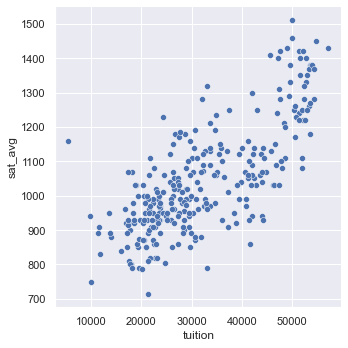

In [3]:
# Put your code for question 1.1 here
sns.relplot(x = "tuition", y = "sat_avg", data = uni)

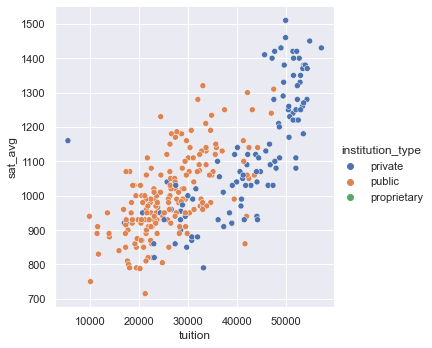

In [4]:
# Put your code for question 1.2 here
sns.relplot(x = "tuition", y = "sat_avg", data = uni, hue = "institution_type")

<!-- END QUESTION -->

### Answer 1

There appears to be a positive linear correlation between tuition and average SAT score. In the second graph, we see that private institutions tend to have higher tuition and higer average SAT scores. However, for public and private institutions with similar tuitions, it appears that public institutions tend to have higher average SAT scores.

<!-- END QUESTION -->

### Question 2.1

Below, we plot a histogram of `hs_gpa_avg`, the average high school gpa, for the schools. We set the `bins` manually. Identify at least two problems with our setting of `bins` that make the histogram difficult to read and or misleading. You do not need to replot the histogram to answer this question, but you are welcome to modify the `bins` parameter to see what different settings would give you in the visualization. Put your answer in "Answer 2.1" cell.

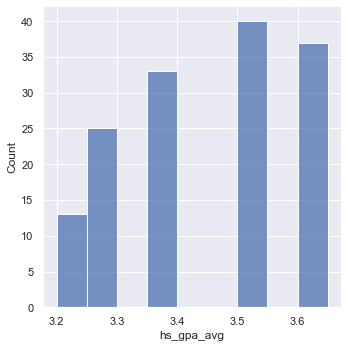

In [5]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", bins=[3.2 + 0.05*i for i in range(10)])

### Answer 2.1

The x-axis labels do not align with the data that is being visualized - where each bin is 0.05 units wide, but the labels incremenet every 0.1. In addition, the GPA range shown in this plot is very limited, restricting one's ability to arrive at accurate conclusions.

<!-- END QUESTION -->

### Question 2.2

Below we plot a heat map that visualizes the relationship between `hs_gpa_avg` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis. It looks like there is a strong relationship between `hs_gpa_avg` and `sat_avg`. Suppose someone interprets this plot by saying "Look, every student who has a good high school gpa of 3.75 or above gets a SAT score of at least 900 or so." Why is this not necessarily true? Put your answer in "Answer 2.2" cell.

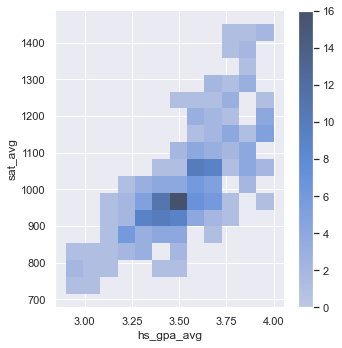

In [6]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", y="sat_avg", cbar=True)

### Answer 2.2

The graph shows the average SAT and GPA for each university. For a particular university, students will have scored above and below the average SAT and GPA. Thus the given interpretation is incorrect because someone who had a 3.75 GPA could have gotten lower than a 900 SAT score given that someone else at the same university with the same GPA had an SAT score of 900 or higher.

<!-- END QUESTION -->

### Question 3
1. Generate a bar plot showing the difference in the distribution of `hs_gpa_avg` between `public` and `private` schools. That is, there should be two bars showing the average values of `hs_gpa_avg` for `public` vs. `private` schools. There are a small number of `proprietary` schools in the dataset which are missing data in this category; filter those out so they do not appear in this visualization.
2. Visualize the same information as in step 1, but using a box plot to visualize the distributions. As in step 1, do not include `proprietary` schools in the visualization. Briefly interpret your results, especially explaining what information the box plot visualizes that was not clear in the earlier bar plot. Explain in "Answer 3" cell.

<!-- BEGIN QUESTION -->



<AxesSubplot:xlabel='institution_type', ylabel='hs_gpa_avg'>

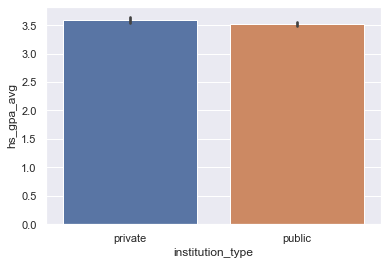

In [7]:
# Put your code for 3.1 here
uni_copy = uni.copy()
uni_filtered = uni_copy[uni["institution_type"] != "proprietary"]

sns.barplot(x = "institution_type", y = "hs_gpa_avg", data = uni_filtered)

<AxesSubplot:xlabel='institution_type', ylabel='hs_gpa_avg'>

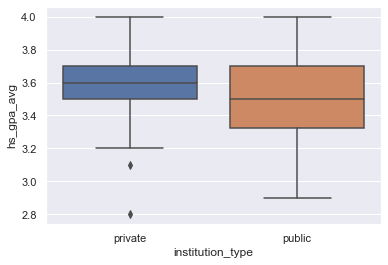

In [8]:
# Put your code for 3.2 here
sns.boxplot(x = "institution_type", y = "hs_gpa_avg", data = uni_filtered)

<!-- END QUESTION -->

### Answer 3

From the boxplot we can see the distribution of the average high school GPA of private and public institutions. This distribution includes spread, median, quartiles, minimums, and maximums, which are all data given by a boxplot. It is difficult to arrive at any significant conclusions from the bar plot.

<!-- END QUESTION -->

### Question 4
1. Generate a line plot of `us_rank` on the horizontal `x` axis and `tuition` on the vertical `y` axis. 
2. In a single figure, plot the same line as in step 2 in one color and another line for `cost_after_aid` on the vertical `y` axis in a different color. Use the same `us_rank` ordering on the horizontal `x` axis for both. Note that you may need to wrangle your data somewhat to produce this on the same plot rather than directly using the `uni` dataframe.
3. In step 2 we plotted `tuition` and `cost_after_aid` on the same vertical `y` axis. Briefly explain why that was reasonable, but it would not make sense to plot `tuition` and `enrollment` on the same vertical `y` axis in the same way. Explain in "Answer 4" cell.

<!-- BEGIN QUESTION -->



<AxesSubplot:xlabel='us_rank', ylabel='tuition'>

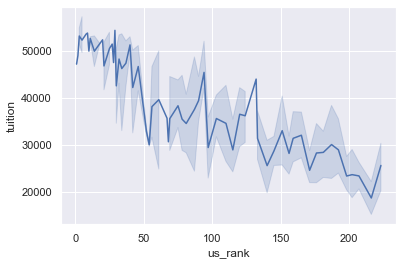

In [9]:
# Put your code for 4.1 here
sns.lineplot(data = uni, x = "us_rank", y = "tuition")

<AxesSubplot:xlabel='us_rank', ylabel='value'>

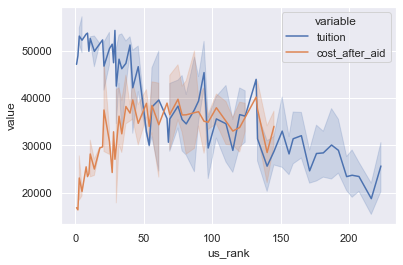

In [10]:
# Put your code for 4.2 here
df = pd.melt(uni, id_vars = ['us_rank'], value_vars = ['tuition', 'cost_after_aid'])
sns.lineplot(data = df, x = "us_rank", y = "value", hue = "variable")

<!-- END QUESTION -->

### Answer 4

It's reasonable to show tuition and cost after aid on the same axis because they are both measured in US dollars. Enrollment and tuition should not be on the same axis becasuse they are measured in two different units.

<!-- END QUESTION -->

### Question 5
Inside of the homework folder we include an image `state_enrollments_fig.png` that visualizes the total enrollment of all of the universities in the `uni` dataset grouped by state. It is a horizontal bar plot that is sorted by the values from greatest to least. It was generated by manipulating the `uni` dataset with Pandas and then plotting with Seaborn.

Create a similar visualization, except instead of just visualizing total enrollment by state, visualize total enrollment per capita by state. That is, for each state, calculate the total enrollment in that state across all universities in the `uni` dataset, and then divide by that state's population. You can find the state populations as of the 2010 census in the `state_pops.csv` dataset, which uses the same two letter abbreviations for state names as the `uni` dataset.

Some tips on making your plot look like `state_enrollments_fig.png`:
- To prevent the image being "squashed" vertically, set the `height` parameter of the Seaborn plot call to `10`. 
- To simplify the colors to be gray rather than a rainbow, set the `color` parameter to `"gray"`.
- To make the bar plot horizontal, use the numerical variable (in this case enrollment per capita) for the horizontal `x` axis in Seaborn and the categorical variable (in this case the state name) for the vertical `y` axis.
- To sort the bars, you can either [sort the dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) according to the appropriate values before plotting or you can compute the ordering and then pass it to [the Seaborn order parameter](https://seaborn.pydata.org/generated/seaborn.catplot.html).

<!-- BEGIN QUESTION -->



<AxesSubplot:xlabel='enrollment_per_capita', ylabel='state'>

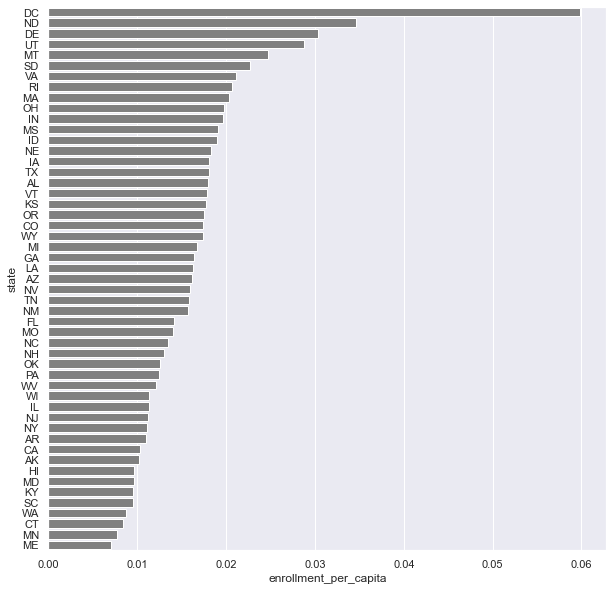

In [11]:
# Put your code here for problem 5
# Feel free to add additional cells
pop = pd.read_csv("state_pops.csv")
cop = uni.copy()
total = cop.groupby(['state'])['enrollment'].sum()
pd3 = pop.merge(total, on = "state")
pd3["enrollment_per_capita"] = pd3['enrollment'] / pd3['population_2010']
sorted = pd3.sort_values(by = ["enrollment_per_capita"], ascending = False)

sns.set(rc = {'figure.figsize': (10, 10)})
sns.barplot(x = "enrollment_per_capita", y = 'state', data = sorted, color = "gray")

In [12]:
# Feel free to use this cell for exploring data

<!-- END QUESTION -->

## Submitting

You should make sure any code that you write to answer the questions is included in this notebook. We recommend you go to the Kernel option and choose \"Restart & Run All.\" Double check that your entire notebook runs correctly and generates the expected output. Finally, make sure to save your work (timestamp at the top tells you the last checkpoint and whether there are unsaved changes). When you finish, submit your assignment at [Gradescope](http://gradescope.com/).